### Week7-8: VillageConnect Project

In [1]:
import pandas as pd
df = pd.read_csv("VillageConnect.csv")
df.head()

,Village,Region,Service,Availability,Distance_to_HQ_km,Satisfaction_Score
0,Rampur,East,Electricity,Yes,3.5,4.2
1,Lakshmi Nagar,West,Water,No,6.1,3.1
2,Shivpur,North,Healthcare,Yes,4.2,4.5
3,Basantpur,South,Internet,No,7.8,2.9
4,Rajgarh,East,Transport,Yes,5.0,3.8


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Village             50 non-null     object 
 1   Region              50 non-null     object 
 2   Service             50 non-null     object 
 3   Availability        50 non-null     object 
 4   Distance_to_HQ_km   50 non-null     float64
 5   Satisfaction_Score  50 non-null     float64
dtypes: float64(2), object(4)
memory usage: 2.5+ KB


In [4]:
dup_count = df.duplicated().sum()
print(f"Duplicates:{dup_count}")

Duplicates:40


In [6]:
df = df.drop_duplicates()
print(df.shape)

(10, 6)


In [7]:
import sqlite3

In [13]:
conn = sqlite3.connect("VillageConnect.db")
df.to_sql("services", conn, if_exists="replace", index= False)
print(conn.execute("SELECT COUNT(*) FROM services").fetchone()[0])

10


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("VillageConnect.csv")
df.drop_duplicates(inplace= True)

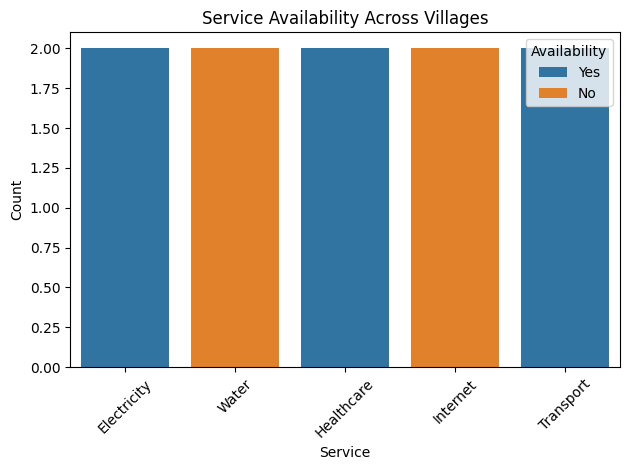

In [18]:
#Service Availability Count
sns.countplot(data = df, x = 'Service', hue = 'Availability')
plt.title("Service Availability Across Villages")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

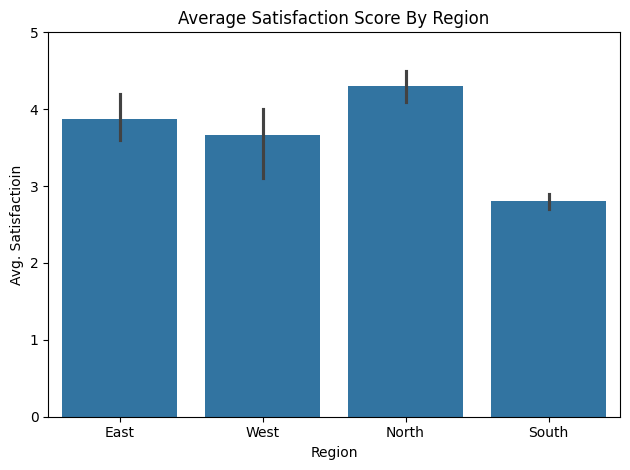

In [21]:
#Region-wise service satisfaction
sns.barplot(data = df, x = 'Region', y = 'Satisfaction_Score', estimator = 'mean')
plt.title("Average Satisfaction Score By Region")
plt.ylabel("Avg. Satisfactioin")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

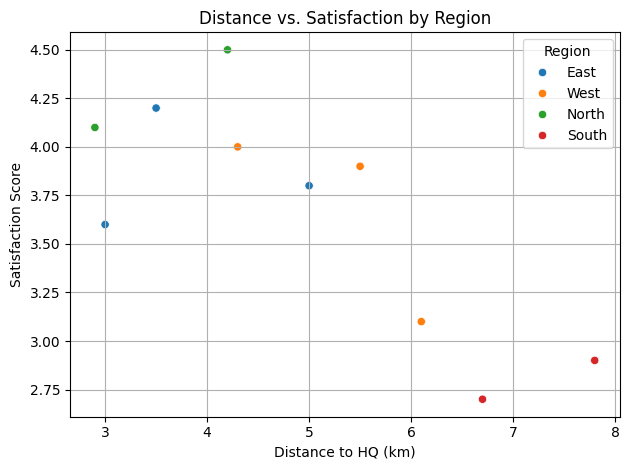

In [22]:
#Distance vs Satisfaction
sns.scatterplot(data=df, x='Distance_to_HQ_km', y='Satisfaction_Score', hue='Region')
plt.title("Distance vs. Satisfaction by Region")
plt.xlabel("Distance to HQ (km)")
plt.ylabel("Satisfaction Score")
plt.grid(True)
plt.tight_layout()
plt.show()


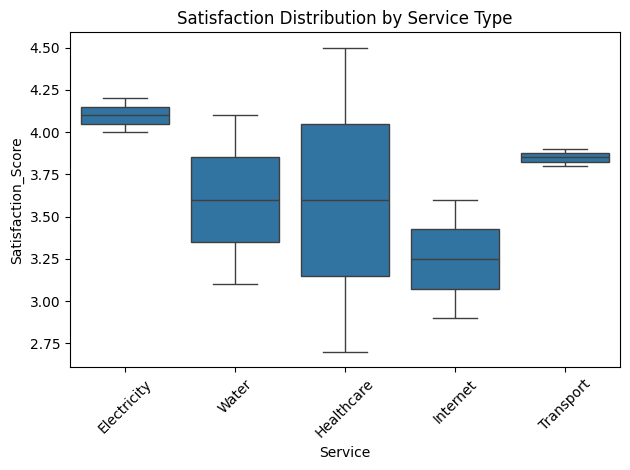

In [23]:
#Boxplot by Service
sns.boxplot(data=df, x='Service', y='Satisfaction_Score')
plt.title("Satisfaction Distribution by Service Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
import sqlite3
conn = sqlite3.connect("VillageConnect.db")

In [25]:
query = "SELECT *FROM services"
df_all = pd.read_sql_query(query, conn)
df_all.head()


,Village,Region,Service,Availability,Distance_to_HQ_km,Satisfaction_Score
0,Rampur,East,Electricity,Yes,3.5,4.2
1,Lakshmi Nagar,West,Water,No,6.1,3.1
2,Shivpur,North,Healthcare,Yes,4.2,4.5
3,Basantpur,South,Internet,No,7.8,2.9
4,Rajgarh,East,Transport,Yes,5.0,3.8


In [30]:
query = """
SELECT Region, COUNT(*) as total_services
FROM services
GROUP BY Region
ORDER BY total_services DESC
"""
pd.read_sql_query(query, conn)

,Region,total_services
0,West,3
1,East,3
2,South,2
3,North,2


In [32]:
query = """
SELECT Service, AVG(satisfaction_Score) as avg_satisfaction
FROM services
GROUP BY Service
ORDER BY avg_satisfaction DESC
"""
pd.read_sql_query(query, conn)

,Service,avg_satisfaction
0,Electricity,4.10
1,Transport,3.85
2,Healthcare,3.60
3,Water,3.60
4,Internet,3.25


In [33]:
query = """
SELECT Service, COUNT(*) as unavailable_count
FROM services
WHERE Availability = 'No'
GROUP BY Service
ORDER BY unavailable_count DESC
"""
pd.read_sql_query(query, conn)

,Service,unavailable_count
0,Water,2
1,Internet,2


In [34]:
query = """
SELECT Region, ROUND(AVG(Satisfaction_Score), 2) as avg_satisfaction
FROM services
GROUP BY Region
ORDER BY avg_satisfaction ASC
LIMIT 1
"""
pd.read_sql_query(query, conn)


,Region,avg_satisfaction
0,South,2.8


In [35]:
query = """
SELECT Village, MAX(Distance_to_HQ_km) as max_distance
FROM services
"""
pd.read_sql_query(query, conn)


,Village,max_distance
0,Basantpur,7.8


In [42]:
# ML workflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [43]:
pd = pd.read_csv("VillageConnect.csv")

In [46]:
 #Encode categorical columns
le_region = LabelEncoder()
le_service = LabelEncoder()
le_avail = LabelEncoder()

df['Region'] = le_region.fit_transform(df['Region'])
df['Service'] = le_service.fit_transform(df['Service'])
df['Availability'] = le_avail.fit_transform(df['Availability'])


In [47]:
X = df[['Region', 'Service', 'Availability', 'Distance_to_HQ_km']]
y = df['Satisfaction_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [51]:
print(f"✅ Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

✅ Linear Regression Results:
Mean Squared Error (MSE): 0.22
R² Score: -2.45


In [54]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🌳 Decision Tree Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


🌳 Decision Tree Results:
Mean Squared Error (MSE): 0.50
R² Score: -7.00


## Predictive Modeling Summary (Day 34)

We applied multiple models to predict Satisfaction_Score:
- Linear Regression
- Decision Tree

All models gave poor R² (< 0), due to:
- Limited dataset size
- Low feature-target correlation
- Potential repetition/duplication in data

This experiment highlights the **importance of data quality** and quantity in predictive analytics.

> 📌 Mean Squared Error remained low (~0.2–0.5), but R² was negative.

📌 Future improvement: Collect real-world data with larger sample size and richer features.
